Лабораторна робота № 7
Смислов Даніл
ІП-01

Спочатку імпортуємо потрібні для роботи бібліотеки

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

Тепер давайте імпортуємо датасет з інформацією про захворювання на Covid.

In [2]:
def getDataset():
    data = pd.read_csv('covidInfo.csv',index_col=['date'],parse_dates=['date'])
    return data 

dataset = getDataset()
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186899 entries, 2020-02-24 to 2022-05-15
Data columns (total 66 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    186899 non-null  object 
 1   continent                                   176020 non-null  object 
 2   location                                    186899 non-null  object 
 3   total_cases                                 179484 non-null  float64
 4   new_cases                                   179199 non-null  float64
 5   new_cases_smoothed                          178027 non-null  float64
 6   total_deaths                                161131 non-null  float64
 7   new_deaths                                  161104 non-null  float64
 8   new_deaths_smoothed                         159949 non-null  float64
 9   total_cases_per_million                     178655 non

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-29,AFG,Asia,Afghanistan,5.0,0.0,0.714,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-03-01,AFG,Asia,Afghanistan,5.0,0.0,0.714,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-03-02,AFG,Asia,Afghanistan,5.0,0.0,0.000,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-03-03,AFG,Asia,Afghanistan,5.0,0.0,0.000,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Тепер давайте залишимо саме потрібні нам дані.

In [3]:
dataset = dataset[['location','new_cases']]
dataset.info()
dataset.tail(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186899 entries, 2020-02-24 to 2022-05-15
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   location   186899 non-null  object 
 1   new_cases  179199 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.3+ MB


,location,new_cases
date,,
2022-05-06,Zimbabwe,164.0
2022-05-07,Zimbabwe,0.0
2022-05-08,Zimbabwe,138.0
2022-05-09,Zimbabwe,184.0
2022-05-10,Zimbabwe,106.0
2022-05-11,Zimbabwe,0.0
2022-05-12,Zimbabwe,301.0
2022-05-13,Zimbabwe,188.0
2022-05-14,Zimbabwe,75.0


Для зручності давайте перейменуємо стовпчики

In [4]:
dataset = dataset.rename(columns={'location':'Country','new_cases':'New Cases'})
dataset.info()
dataset.tail(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186899 entries, 2020-02-24 to 2022-05-15
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Country    186899 non-null  object 
 1   New Cases  179199 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.3+ MB


,Country,New Cases
date,,
2022-05-06,Zimbabwe,164.0
2022-05-07,Zimbabwe,0.0
2022-05-08,Zimbabwe,138.0
2022-05-09,Zimbabwe,184.0
2022-05-10,Zimbabwe,106.0
2022-05-11,Zimbabwe,0.0
2022-05-12,Zimbabwe,301.0
2022-05-13,Zimbabwe,188.0
2022-05-14,Zimbabwe,75.0


Тепер давайте згрупуємо дані по країнах та оберемо для України та межуючої з нею Польщі.

In [5]:
dataset = dataset[(dataset['Country']=='Ukraine') | (dataset['Country']=='Poland')]
print(dataset)

            Country  New Cases
date                          
2020-03-03   Poland        1.0
2020-03-04   Poland        1.0
2020-03-05   Poland        0.0
2020-03-06   Poland        4.0
2020-03-07   Poland        0.0
...             ...        ...
2022-05-11  Ukraine        0.0
2022-05-12  Ukraine        0.0
2022-05-13  Ukraine        0.0
2022-05-14  Ukraine        0.0
2022-05-15  Ukraine        0.0

[1608 rows x 2 columns]


Давайте перевіримо на коректність даних.

In [6]:
print(dataset[dataset['New Cases']<0])

Empty DataFrame
Columns: [Country, New Cases]
Index: []


Добре, давайте переробимо в таблицю, з якою буде зручніше працювати.

In [7]:
dataset = dataset.pivot_table(values = ['New Cases'],index = ['date'],columns = ['Country'])

dataset.info()
dataset.head(100)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 804 entries, 2020-03-03 to 2022-05-15
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (New Cases, Poland)   804 non-null    float64
 1   (New Cases, Ukraine)  804 non-null    float64
dtypes: float64(2)
memory usage: 18.8 KB


New Cases        
Country       Poland Ukraine
date                        
2020-03-03       1.0     1.0
2020-03-04       1.0     0.0
2020-03-05       0.0     0.0
2020-03-06       4.0     0.0
2020-03-07       0.0     0.0
...              ...     ...
2020-06-06     576.0   559.0
2020-06-07     575.0   498.0
2020-06-08     599.0   478.0
2020-06-09     400.0   402.0
2020-06-10     282.0   536.0

[100 rows x 2 columns]

Гуд, можемо працювати з даними. Давайте візуалізуємо динаміку Covid в часі в Польщі та Україні.

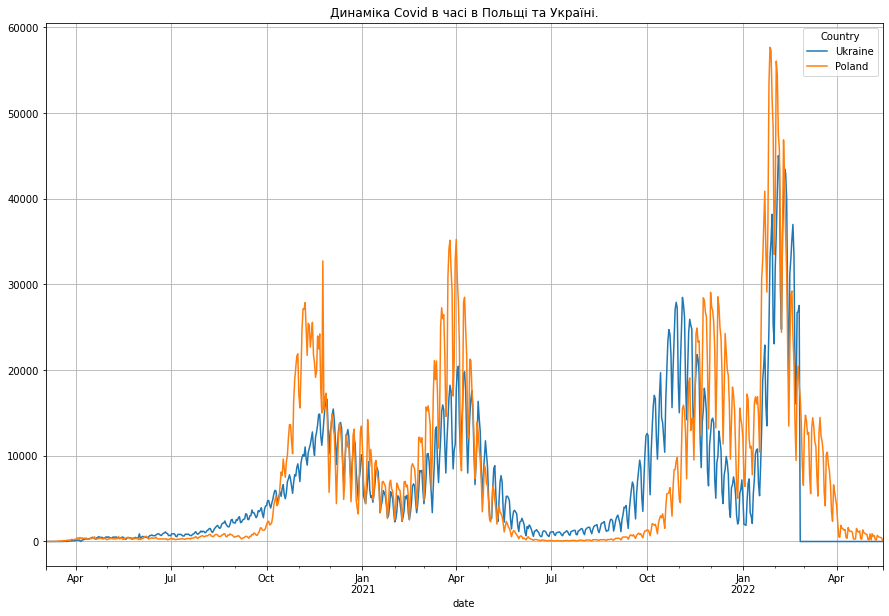

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
dataset['New Cases'][['Ukraine','Poland']].plot(ax=ax)
plt.title('Динаміка Covid в часі в Польщі та Україні.')
ax.grid()
plt.show()

Давайте проаналізуємо окремо дані про захворювання в Україні.

In [9]:
ukrDataset = dataset['New Cases']['Ukraine']
ukrDataset.describe()


count      804.000000
mean      6269.300995
std       7953.963205
min          0.000000
25%        708.250000
50%       2966.500000
75%       9191.500000
max      45022.000000
Name: Ukraine, dtype: float64

Тепер про захворювання в Польщі.

In [10]:
polDataset = dataset['New Cases']['Poland']
polDataset.describe()

count      804.000000
mean      7466.961443
std      10209.971781
min          0.000000
25%        361.000000
50%       2006.500000
75%      12110.000000
max      57659.000000
Name: Poland, dtype: float64

Тепер давайте побудуємо 2 гістограми по кількості захворювань для країн.

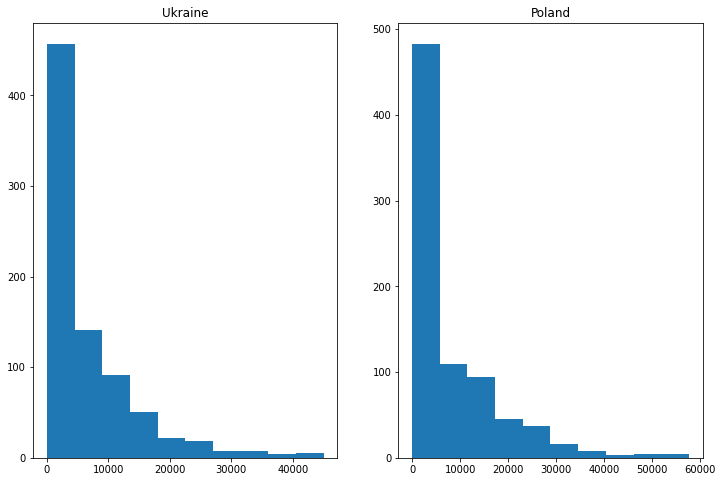

In [11]:
fig, ax = plt.subplots(1,2,figsize = (12,8))
ax[0].set_title('Ukraine')
ax[0].hist(ukrDataset)
ax[1].set_title('Poland')
ax[1].hist(polDataset)

plt.show()

Для кращої візуалізації властивостей ряду давайте застосуємо згладжування за допомогою ковзаючого середнього.

Ukraine


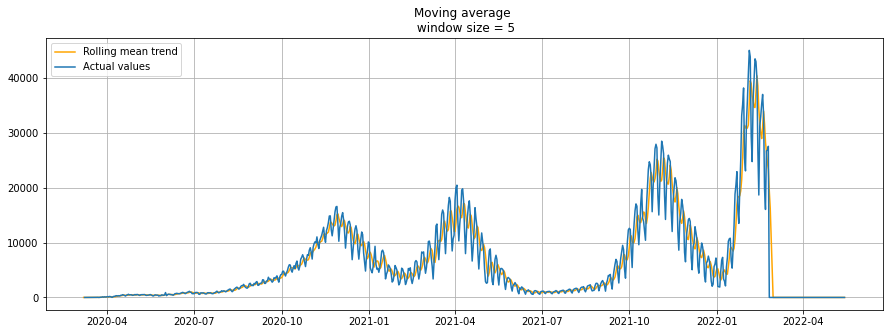

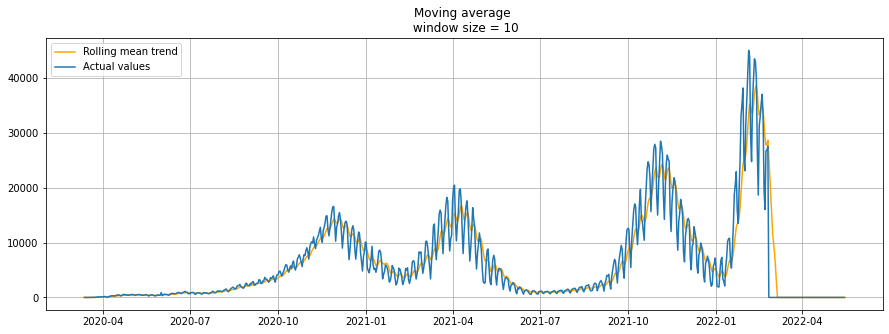

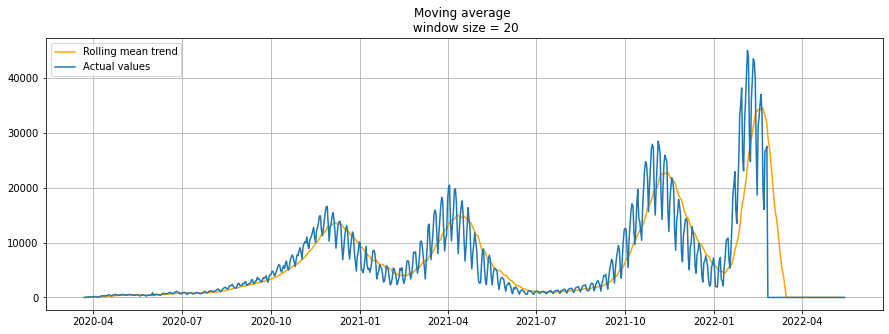

Poland


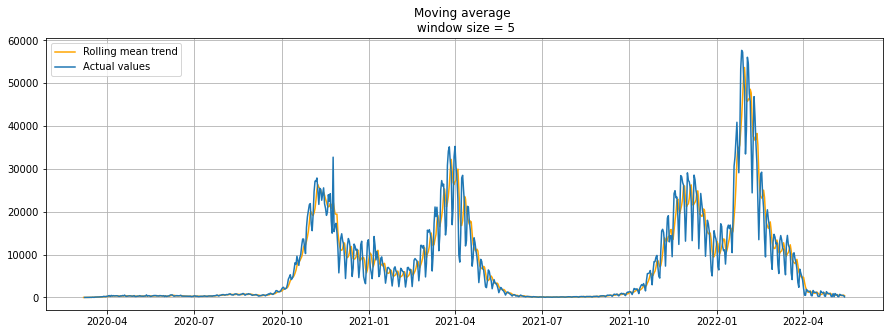

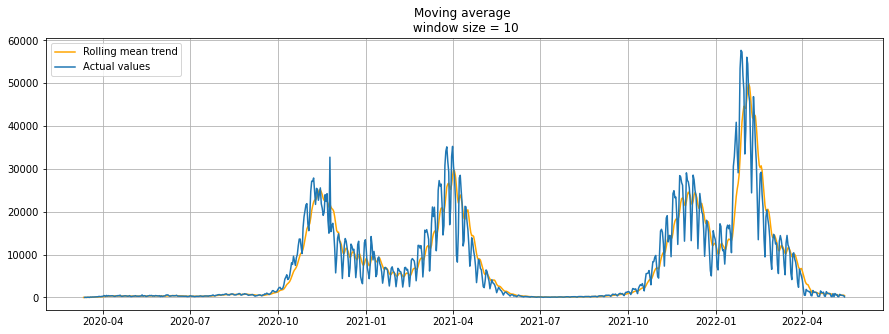

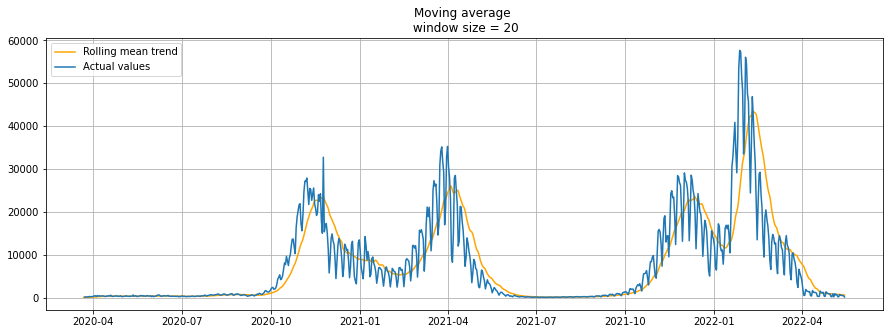

In [12]:
def plot_moving_average(series,n):
    rolling_mean = series.rolling(window=n).mean()
    plt.figure(figsize=(15,5))
    plt.title(f'Moving average \n window size = {n}')
    plt.plot(rolling_mean,c = 'orange',label = 'Rolling mean trend')
    plt.plot(series[n:],label = 'Actual values')
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.show()

print("Ukraine")
plot_moving_average(ukrDataset,5)
plot_moving_average(ukrDataset,10)
plot_moving_average(ukrDataset,20)
print("Poland")
plot_moving_average(polDataset,5)
plot_moving_average(polDataset,10)
plot_moving_average(polDataset,20)

Тепер давайте візуалізуємо декомпозицію ряду на тренд, сезонність та залишки для даних про захворювання в Україні.

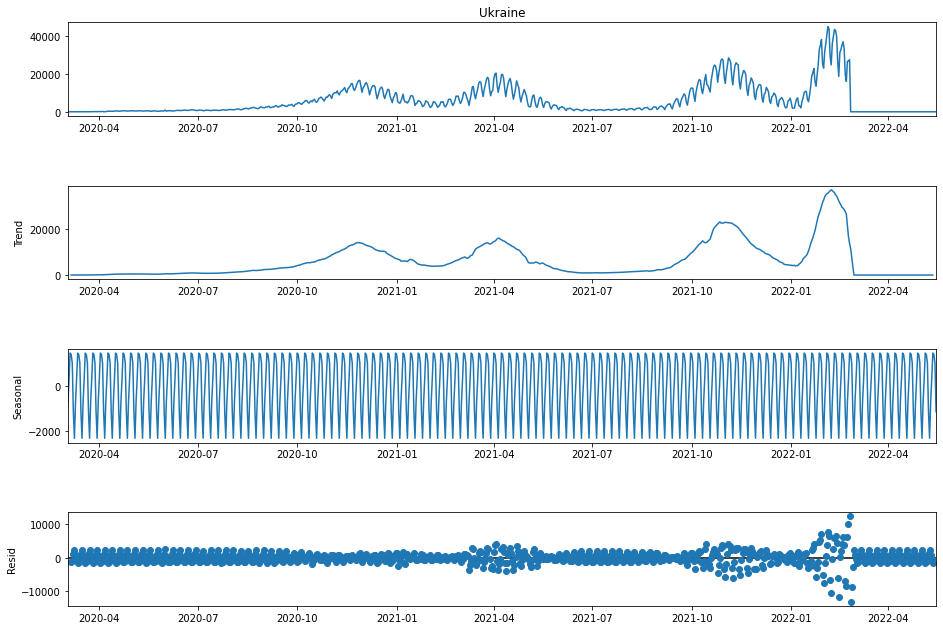

In [13]:
import statsmodels.tsa.api as smt

decomposition = smt.seasonal_decompose(ukrDataset[~ukrDataset.isna()])

fig = decomposition.plot()
fig.set_size_inches(15,10)
plt.show()


Тепер для даних про захворювання в Польщі.

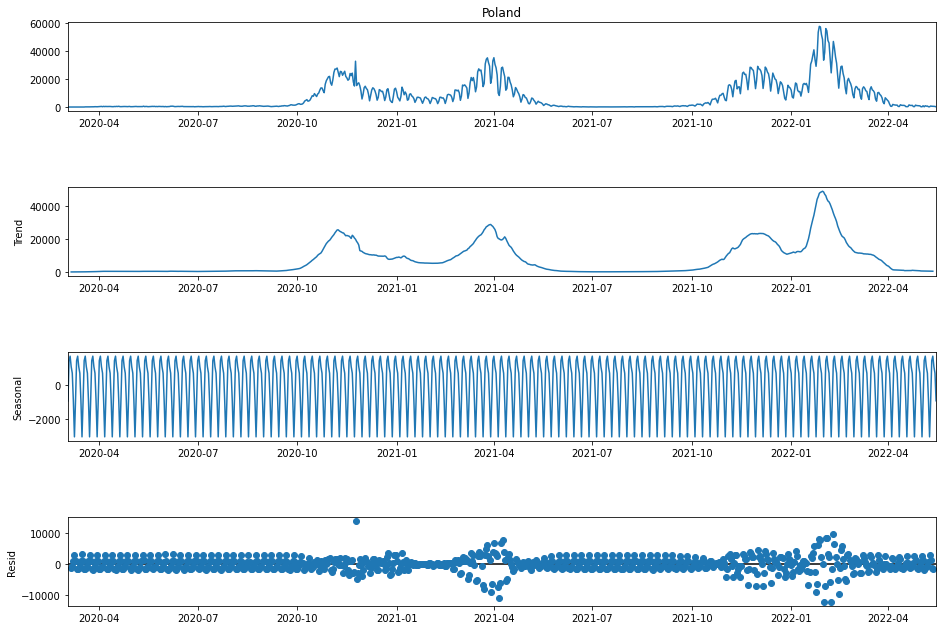

In [14]:
decomposition = smt.seasonal_decompose(polDataset[~polDataset.isna()])

fig = decomposition.plot()
fig.set_size_inches(15,10)
plt.show()


Тепер давайте побудуємо графіки автокореляції та часткової автокореляції.

c:\Users\danil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\danil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


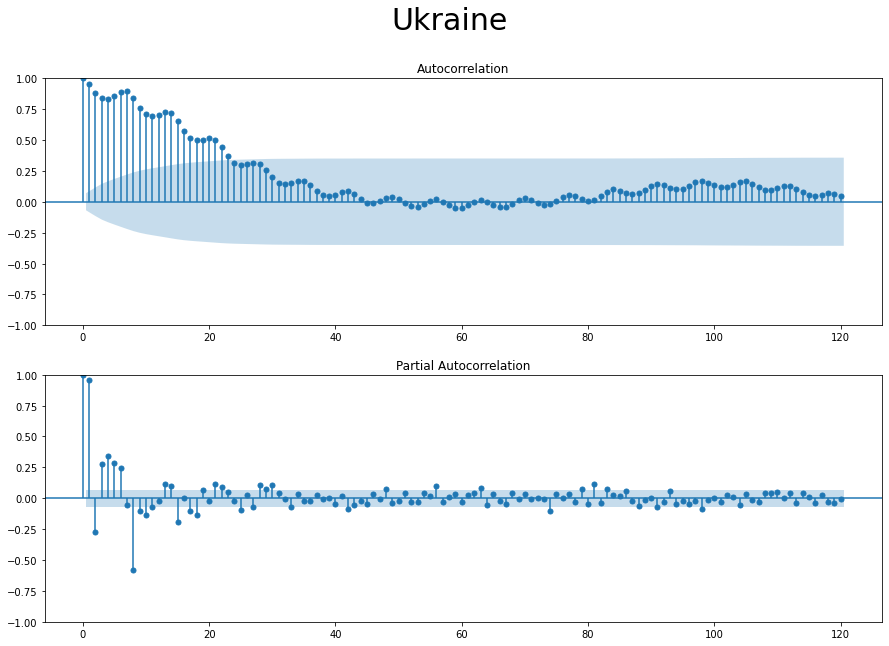

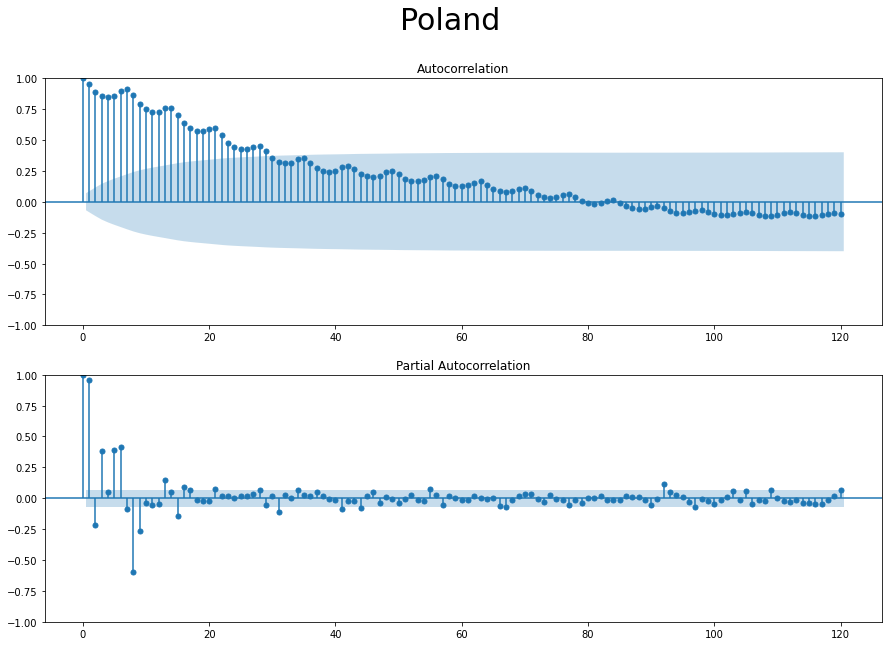

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,figsize=(15,10))
fig.suptitle('Ukraine',fontsize = 30)
ax[0] = plot_acf(ukrDataset[~ukrDataset.isna()],ax=ax[0],lags = 120)
ax[1] = plot_pacf(ukrDataset[~ukrDataset.isna()],ax=ax[1],lags = 120)

fig, ax = plt.subplots(2,figsize=(15,10))
fig.suptitle('Poland',fontsize = 30)
ax[0] = plot_acf(polDataset[~polDataset.isna()],ax=ax[0],lags = 120)
ax[1] = plot_pacf(polDataset[~polDataset.isna()],ax=ax[1],lags = 120)

Тепер перевіримо ряд на стаціонарність за допомогою доповненого тесту Дікі-Фуллера.

In [16]:
def dickey_fuller_test(series):
    test = smt.adfuller(series,autolag = 'AIC')
    print('adf: ',test[0])
    print('p-value: ',test[1])
    print('Critical values: ',test[4])
    if(test[0]>test[4]['5%']):
        print('Наявні одиничні корені, ряд не стаціонарний')
    else:
        print('Одиничні корені відсутні, ряд стаціонарний.')

dickey_fuller_test(ukrDataset[~ukrDataset.isna()])
dickey_fuller_test(polDataset[~polDataset.isna()])

adf:  -3.7429715235705117
p-value:  0.0035477545948981257
Critical values:  {'1%': -3.4387398917732193, '5%': -2.8652430432199654, '10%': -2.5687418568690683}
Одиничні корені відсутні, ряд стаціонарний.
adf:  -3.31929293536957
p-value:  0.014037799680067773
Critical values:  {'1%': -3.438686413400388, '5%': -2.8652194721349424, '10%': -2.5687293001910008}
Одиничні корені відсутні, ряд стаціонарний.


Тепер давайте виконаємо другу частину основного завдання. Для початку імпортуємо датасет та відсортуємо за датою.

In [17]:
def getDataset():
    data = pd.read_csv('USD_UAH.csv',index_col=['Date'],parse_dates=['Date'])
    return data 


dataset = getDataset()
dataset = dataset.sort_index(ascending=True)
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2019-05-17 to 2022-05-17
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     756 non-null    float64
 1   Open      756 non-null    float64
 2   High      756 non-null    float64
 3   Low       756 non-null    float64
 4   Change %  756 non-null    object 
dtypes: float64(4), object(1)
memory usage: 35.4+ KB


,Price,Open,High,Low,Change %
Date,,,,,
2019-05-17,26.3675,26.3470,26.3920,26.3020,0.02%
2019-05-20,26.1250,26.3905,26.3905,26.1250,-0.92%
2019-05-21,26.1750,26.1650,26.4705,26.1100,0.19%
2019-05-22,26.2800,26.1545,26.3450,26.1545,0.40%
2019-05-23,26.3850,26.3250,26.3850,26.2845,0.40%
2019-05-24,26.4250,26.4345,26.5345,26.3595,0.15%
2019-05-27,26.3850,26.4305,26.4305,26.2805,-0.15%
2019-05-28,26.5050,26.3655,26.5400,26.3000,0.45%
2019-05-29,26.7350,26.5925,26.7350,26.5925,0.87%


Як ми бачимо, є пропуски в датах, тому давайте це виправимо.

In [18]:

idx = pd.date_range(dataset.index[0], dataset.index[-1])
dataset = dataset.reindex(idx)
print(dataset.head(10))

for index in dataset.index:
        if pd.isna(dataset.loc[index, 'Price']):
            dataset.loc[index] = dataset.shift().loc[index]
            
print(dataset.head(10))


              Price     Open     High      Low Change %
2019-05-17  26.3675  26.3470  26.3920  26.3020    0.02%
2019-05-18      NaN      NaN      NaN      NaN      NaN
2019-05-19      NaN      NaN      NaN      NaN      NaN
2019-05-20  26.1250  26.3905  26.3905  26.1250   -0.92%
2019-05-21  26.1750  26.1650  26.4705  26.1100    0.19%
2019-05-22  26.2800  26.1545  26.3450  26.1545    0.40%
2019-05-23  26.3850  26.3250  26.3850  26.2845    0.40%
2019-05-24  26.4250  26.4345  26.5345  26.3595    0.15%
2019-05-25      NaN      NaN      NaN      NaN      NaN
2019-05-26      NaN      NaN      NaN      NaN      NaN
              Price     Open     High      Low Change %
2019-05-17  26.3675  26.3470  26.3920  26.3020    0.02%
2019-05-18  26.3675  26.3470  26.3920  26.3020    0.02%
2019-05-19  26.3675  26.3470  26.3920  26.3020    0.02%
2019-05-20  26.1250  26.3905  26.3905  26.1250   -0.92%
2019-05-21  26.1750  26.1650  26.4705  26.1100    0.19%
2019-05-22  26.2800  26.1545  26.3450  26.1545  

Тепер перевіримо дані на коректність.

In [19]:
print(dataset[dataset['Price']<0])
print(dataset[dataset['Open']<0])
print(dataset[dataset['High']<0])
print(dataset[dataset['Low']<0])

Empty DataFrame
Columns: [Price, Open, High, Low, Change %]
Index: []
Empty DataFrame
Columns: [Price, Open, High, Low, Change %]
Index: []
Empty DataFrame
Columns: [Price, Open, High, Low, Change %]
Index: []
Empty DataFrame
Columns: [Price, Open, High, Low, Change %]
Index: []


Як бачимо, від'ємних даних немає. Можемо працювати з даними. Давайте візуалізуємо динаміку ціни по датах.

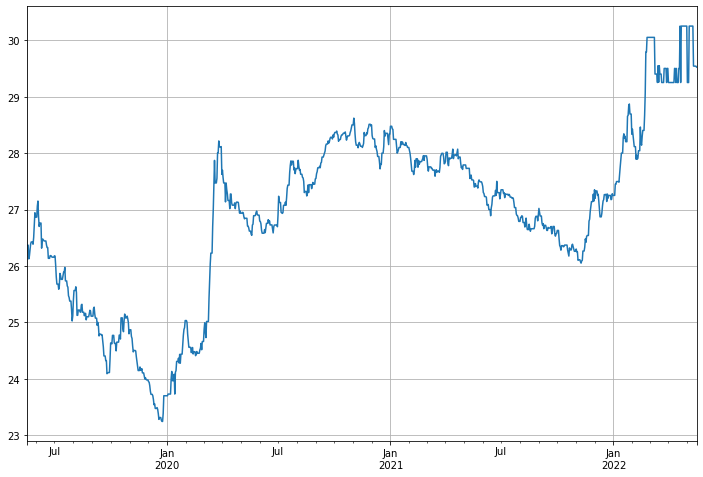

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
dataset['Price'].plot(ax=ax,subplots=True)
ax.grid(True)
plt.show()

Тепер використаємо згладжування для дослідження характеристик ряду.

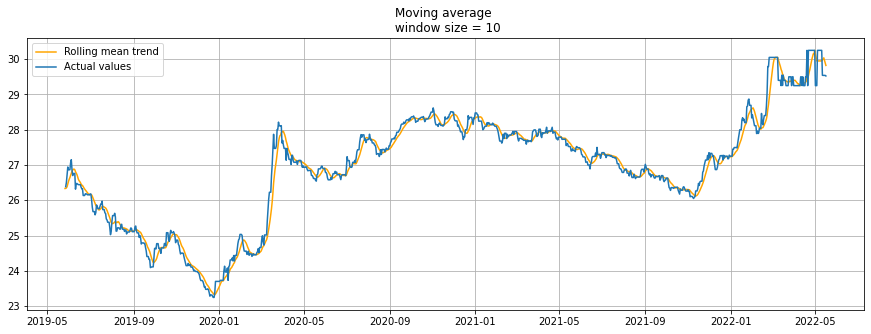

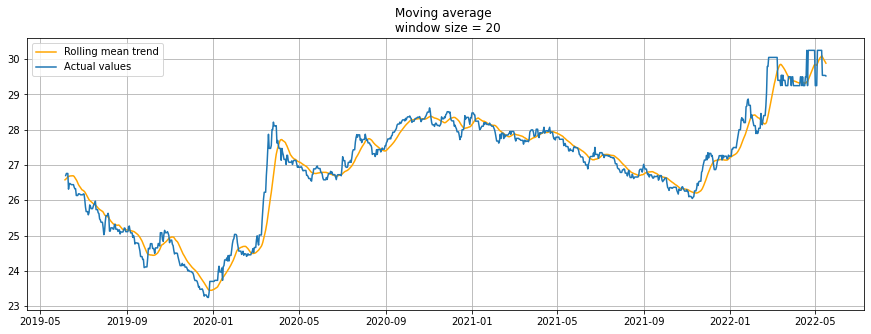

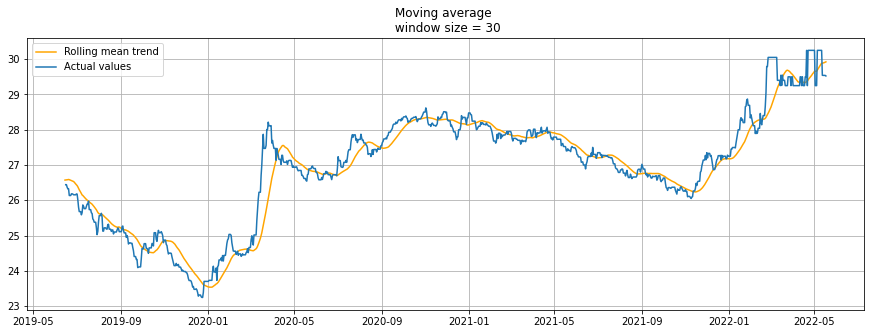

In [21]:
plot_moving_average(dataset['Price'],10)
plot_moving_average(dataset['Price'],20)
plot_moving_average(dataset['Price'],30)

Давайте декомпозуємо ціну на тренд, сезонність та залишки.

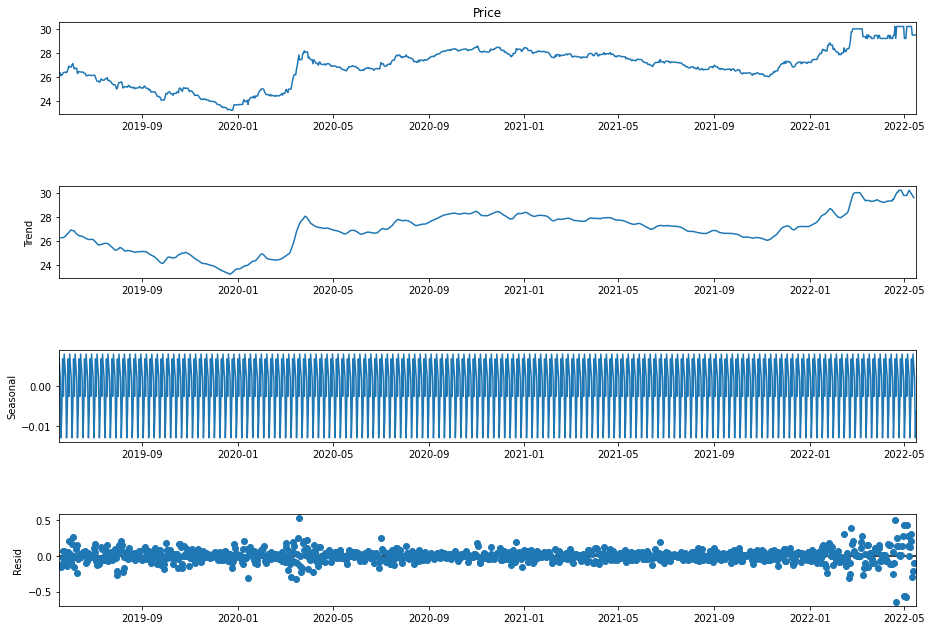

In [22]:
decomposition = smt.seasonal_decompose(dataset['Price'])
fig = decomposition.plot()
fig.set_size_inches(15,10)
plt.show()

Тепер побудуємо графіки автокореляції та часткової автокореляції.

c:\Users\danil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


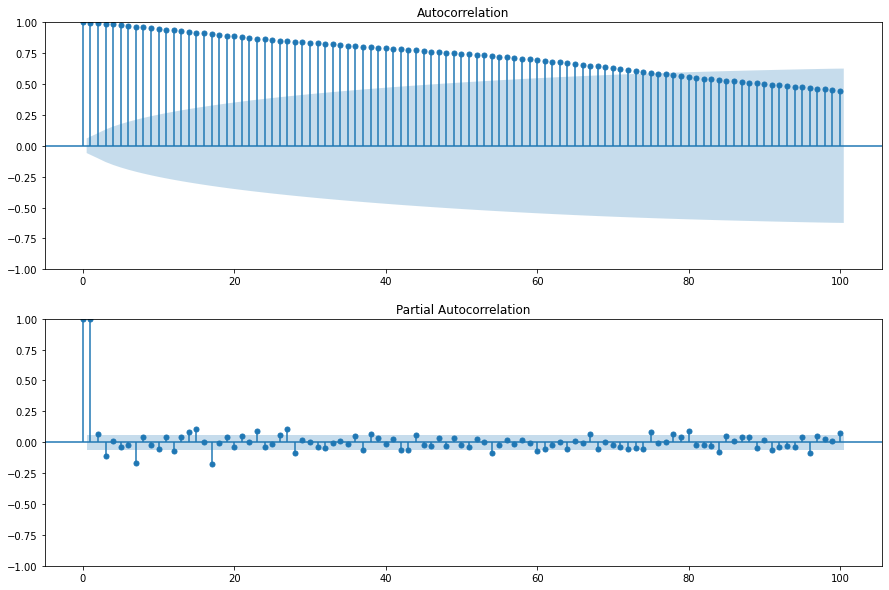

In [23]:
fig, ax = plt.subplots(2,figsize=(15,10))
ax[0] = plot_acf(dataset['Price'], ax=ax[0], lags=100)
ax[1] = plot_pacf(dataset['Price'], ax=ax[1], lags=100)

plt.show()

Перевіримо ряд на стаціонарність.

In [24]:
dickey_fuller_test(dataset['Price'])

adf:  -1.1703685124406151
p-value:  0.6862108181473611
Critical values:  {'1%': -3.4364081161854747, '5%': -2.8642149051061954, '10%': -2.5681942108302214}
Наявні одиничні корені, ряд не стаціонарний


Переходимо до виконання додаткового завдання. Для початку імпортуємо датасет.

In [25]:
def getDataset():
    data = pd.read_csv('seattleWeather_1948-2017.csv',index_col=['DATE'],parse_dates=['DATE'])
    return data 


dataset = getDataset()
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25551 entries, 1948-01-01 to 2017-12-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    25548 non-null  float64
 1   TMAX    25551 non-null  int64  
 2   TMIN    25551 non-null  int64  
 3   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 998.1+ KB


,PRCP,TMAX,TMIN,RAIN
DATE,,,,
1948-01-01,0.47,51,42,True
1948-01-02,0.59,45,36,True
1948-01-03,0.42,45,35,True
1948-01-04,0.31,45,34,True
1948-01-05,0.17,45,32,True
1948-01-06,0.44,48,39,True
1948-01-07,0.41,50,40,True
1948-01-08,0.04,48,35,True
1948-01-09,0.12,50,31,True


Тепер давайте перевіримо дані на пропущені значення.

In [26]:
print( dataset[dataset['PRCP'].isna()])
print( dataset[dataset['TMAX'].isna()])
print( dataset[dataset['TMIN'].isna()])
print( dataset[dataset['RAIN'].isna()])

            PRCP  TMAX  TMIN RAIN
DATE                             
1998-06-02   NaN    72    52  NaN
1998-06-03   NaN    66    51  NaN
2005-09-05   NaN    70    52  NaN
Empty DataFrame
Columns: [PRCP, TMAX, TMIN, RAIN]
Index: []
Empty DataFrame
Columns: [PRCP, TMAX, TMIN, RAIN]
Index: []
            PRCP  TMAX  TMIN RAIN
DATE                             
1998-06-02   NaN    72    52  NaN
1998-06-03   NaN    66    51  NaN
2005-09-05   NaN    70    52  NaN


Давайте заповнимо пропущені дані.

In [27]:
dataset['PRCP'].fillna(0,inplace=True)
dataset['RAIN'].fillna(False,inplace=True)

dataset.head(5)

,PRCP,TMAX,TMIN,RAIN
DATE,,,,
1948-01-01,0.47,51,42,True
1948-01-02,0.59,45,36,True
1948-01-03,0.42,45,35,True
1948-01-04,0.31,45,34,True
1948-01-05,0.17,45,32,True


Гуд, можемо працювати з даними. Давайте візуалізуємо динаміку показників по датах.

C:\Users\danil\AppData\Local\Temp\ipykernel_11404\2611319970.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset[['PRCP','TMAX','TMIN']].plot(ax=ax,subplots = True)


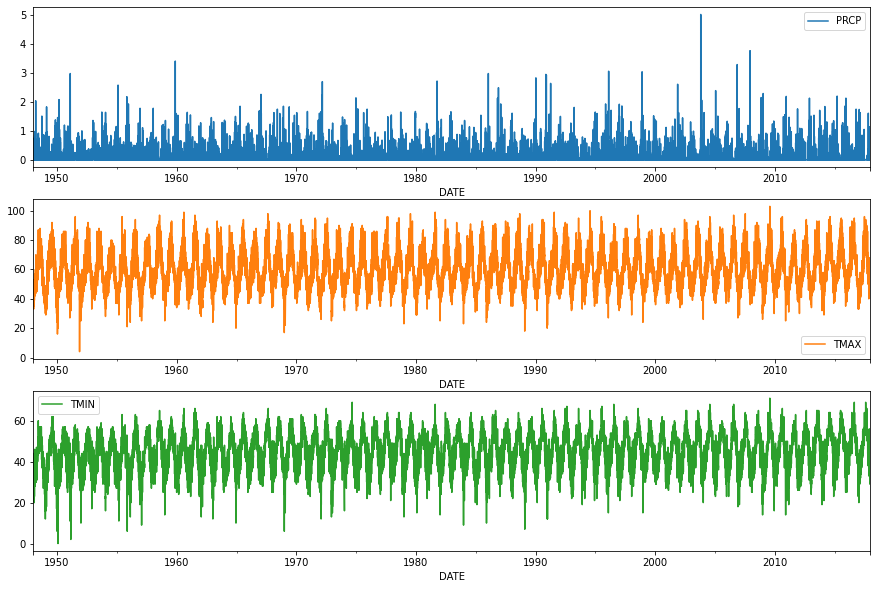

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
dataset[['PRCP','TMAX','TMIN']].plot(ax=ax,subplots = True)
ax.grid(True)
plt.show()

Давайте зменшимо загальний проміжок часу який ми розглядаємо до 1800 днів(прибл. 5 років).

C:\Users\danil\AppData\Local\Temp\ipykernel_11404\2293534273.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset[['PRCP','TMAX','TMIN']].loc[dataset.index[-1800:]].plot(ax=ax,subplots = True)


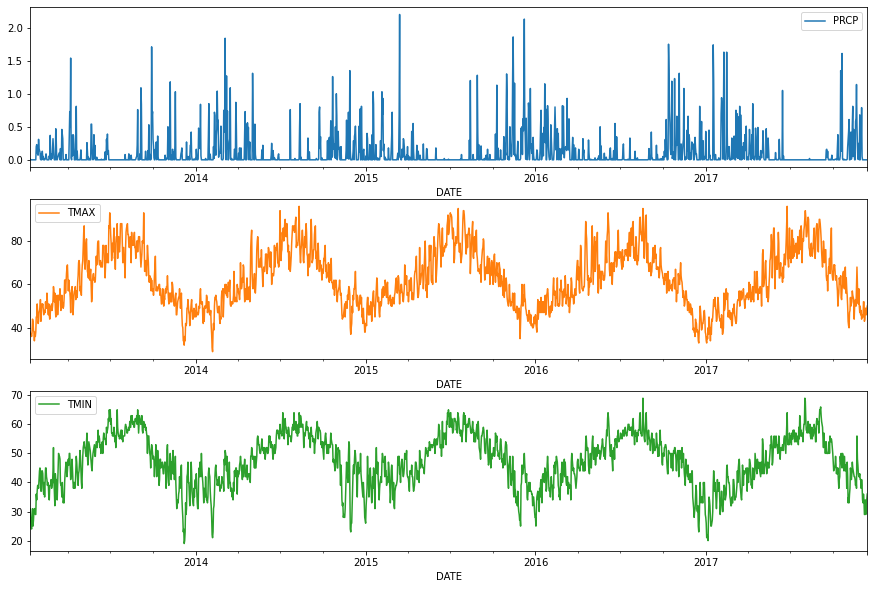

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
dataset[['PRCP','TMAX','TMIN']].loc[dataset.index[-1800:]].plot(ax=ax,subplots = True)
ax.grid(True)
plt.show()

Тепер давайте розглянемо динаміку середніх показників по тижням.

C:\Users\danil\AppData\Local\Temp\ipykernel_11404\1317031360.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  byWeeks.plot(ax=ax, subplots=True)


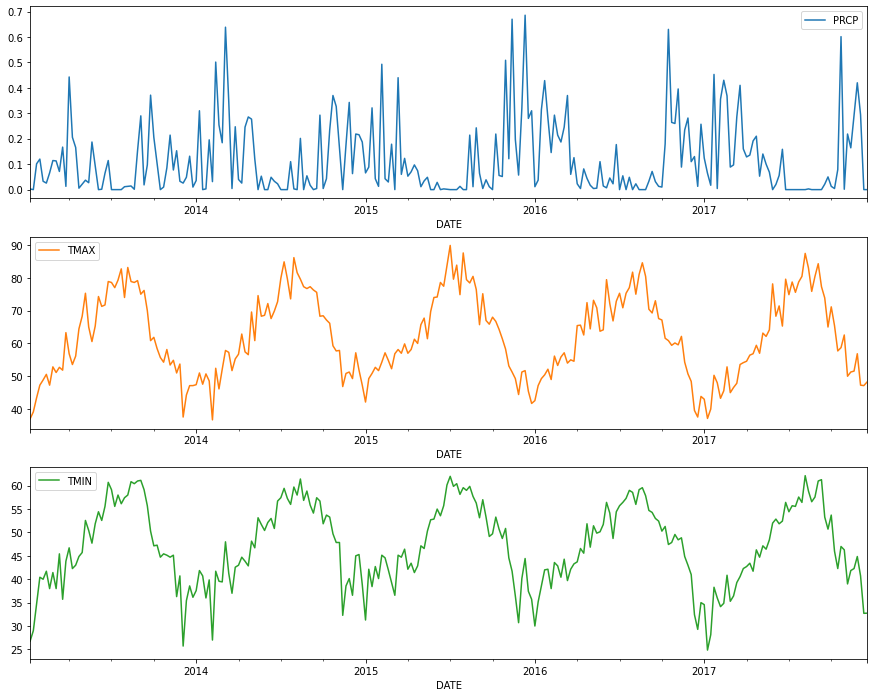

In [30]:
byWeeks = dataset[['PRCP', 'TMAX', 'TMIN']].loc[dataset.index[-1800:]].resample('W').mean()
fig, ax = plt.subplots(figsize=(15, 12))
byWeeks.plot(ax=ax, subplots=True)
ax.grid(True)
plt.show()


Тепер давайте декомпозуємо дані про кількість опадів на тренд, сезонність та залишки.

C:\Users\danil\AppData\Local\Temp\ipykernel_11404\3499130589.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


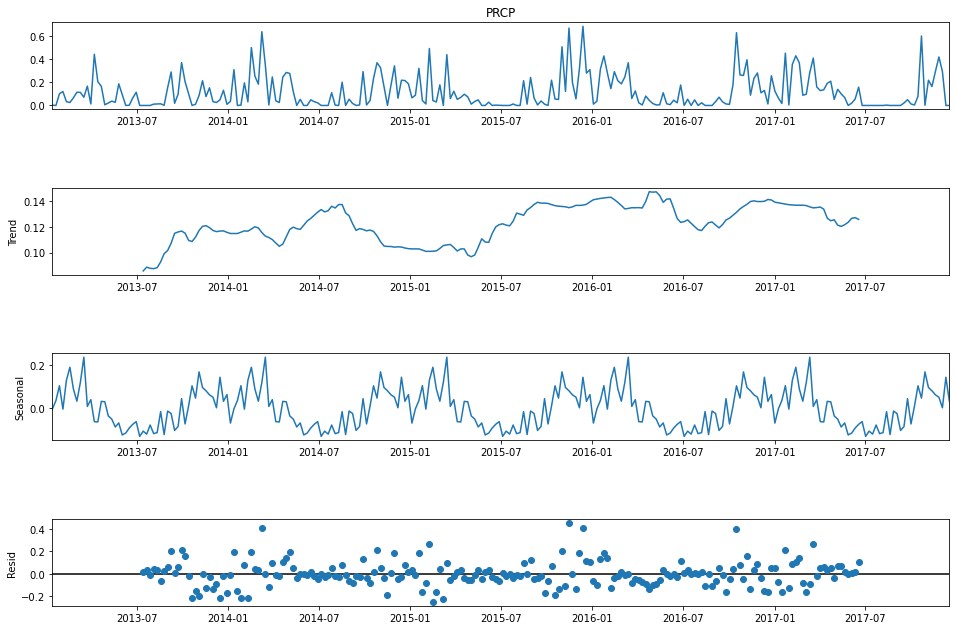

In [31]:
decomposition = smt.seasonal_decompose(byWeeks['PRCP'])
fig = decomposition.plot()
fig.set_size_inches(15,10)
fig.show()

Як ми бачимо, не досить виражена, але присутня сезонність в опадах, більше їх переважно восени та навесні. Побудуємо графіки автокореляції та часткової автокореляції для опадів.

c:\Users\danil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


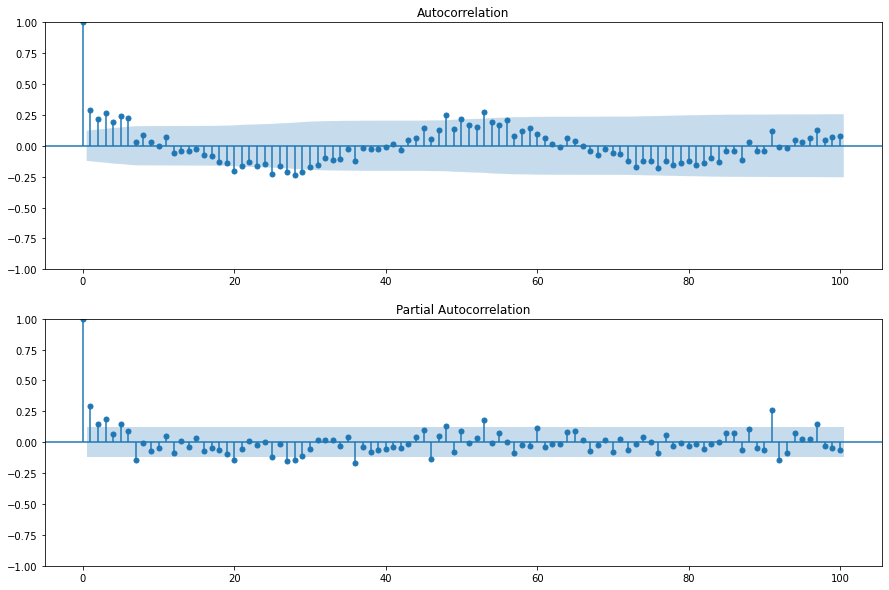

In [32]:
fig,ax = plt.subplots(2,figsize=(15,10))
ax[0] = plot_acf(byWeeks['PRCP'],ax=ax[0],lags = 100)
ax[1] = plot_pacf(byWeeks['PRCP'],ax=ax[1],lags = 100)
plt.show()

Тепер давайте перетворимо градуси в шкалу Цельсія.

In [33]:
dataset['TMIN'] = (dataset['TMIN']-32)*5/9
dataset['TMAX'] = (dataset['TMAX']-32)*5/9

dataset[['TMIN','TMAX']].describe()

,TMIN,TMAX
count,25551.000000,25551.000000
mean,6.952348,15.302337
std,4.940464,7.096102
min,-17.777778,-15.555556
25%,3.333333,10.000000
50%,7.222222,14.444444
75%,11.111111,20.555556
max,21.666667,39.444444


Давайте побудуємо матрицю кореляцй.

In [34]:
corr = dataset[['PRCP','TMIN','TMAX']].corr()

print(corr)

          PRCP      TMIN      TMAX
PRCP  1.000000 -0.064404 -0.226765
TMIN -0.064404  1.000000  0.860684
TMAX -0.226765  0.860684  1.000000


Як ми бачимо, кореляція між температурою та опадами досить невелика. Тепер давайте перевіримо ряд на стаціонарність за допомогою критерія Дікі-Фуллера.

In [35]:
dickey_fuller_test(dataset['PRCP'].loc['2008-01-01':])

adf:  -8.568255379901549
p-value:  8.332077216189508e-14
Critical values:  {'1%': -3.432161725740657, '5%': -2.86234051917851, '10%': -2.5671961289273235}
Одиничні корені відсутні, ряд стаціонарний.


Давайте складемо прогноз опадів на 2018 рік за допомогою моделі ARIMA. Спочатку оберемо тренувальні дані.

In [36]:
trainData = dataset['PRCP'].loc['2010-01-01':]
trainData.describe()

count    2905.000000
mean        0.119194
std         0.256682
min         0.000000
25%         0.000000
50%         0.000000
75%         0.120000
max         2.200000
Name: PRCP, dtype: float64

Застосуємо модель ARIMA.

In [37]:
model = smt.ARIMA(trainData,order = (3, 0, 1)).fit()
model.summary()

c:\Users\danil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\danil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\danil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\danil\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danil

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PRCP   No. Observations:                 2905
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  16.392
Date:                Wed, 25 May 2022   AIC                            -20.783
Time:                        02:27:53   BIC                             15.062
Sample:                    01-01-2010   HQIC                            -7.869
                         - 12-14-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1205      0.027      4.477      0.000       0.068       0.173
ar.L1          1.2252      0.017     70.097      0.000       1.191       1.259
ar.L2         -0.2059      0.020    -10.529      0.000      -0.244      -0.168
ar.L3         -0.0342      0.016     -2.178      0.029      -0.065      -0.003
ma.L1         -0.9496      0.014    -67.542      0.000      -0.977      -0.922
sigma2         0.0579      0.001     66.829      0.000       0.056       0.060
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             31850.16
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                             3.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Тепер давайте візуалізуємо наше передбачення.

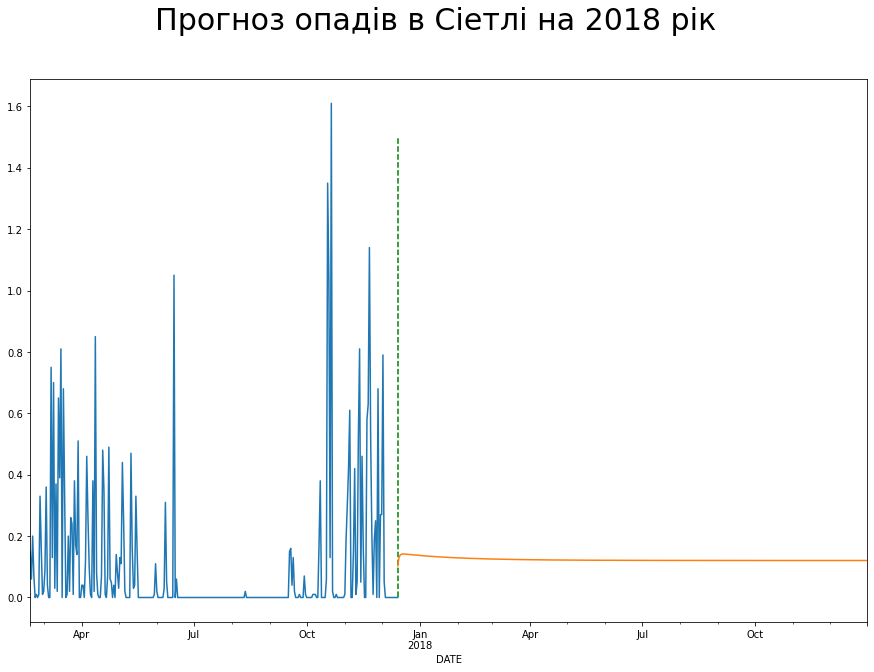

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle('Прогноз опадів в Сіетлі на 2018 рік', fontsize = 30)
ax = trainData.loc[trainData.index[-300:]].plot()
ax.vlines(trainData.index[-1],0,1.5,linestyle='--',color='green',label='Prediction')
ax = model.predict(trainData.index[-1],'2018-12-31',dynamic = True,plot_insample=False,ax=ax).plot()
plt.show()

Отримали ось такий прогноз, він досить сильно згладжує графік і, скоріш за все, в реальному житті опади по днях будуть більш мінливими.